## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/

第一步：使用维基百科下载中文语料库

Done!

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

INFO: Finished 7-process extraction of 1067922 articles in 1053.4s (1013.8 art/s)
INFO: total of page: 2416224, total of articl page: 1067922; total of used articl page: 1067922

Done!

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

In [1]:
!pip install hanziconv

    100% |████████████████████████████████| 286kB 99kB/s 
  Running setup.py bdist_wheel for hanziconv ... done
  Stored in directory: /Users/fung/Library/Caches/pip/wheels/03/d8/3c/c39898fa9c9ce6e34b0ab4c6604892462d440c743715c94054
Successfully built hanziconv
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 2.3MB/s 
distributed 1.21.8 requires msgpack, which is not installed.
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [3]:
from hanziconv import HanziConv

In [6]:
def tradToSimp(inPath, outPath):
    f_o = open(outPath, 'w')
    with open(inPath, 'r') as f:
        line = f.readline()
        while line:
            if line == '\n':
                line = f.readline()
                continue
            f_o.write(HanziConv.toSimplified(line))
            line = f.readline()
    f_o.close()
    print('Done!')

In [7]:
tradToSimp('wiki_00', 'wiki_simp_2')

Done!


In [7]:
import re

def cleanFile(inPath, outPath):
    count_line = 0
    ptn1 = '<.+?>' 
    ptn2 = "[“”（）<>《》【】「」『』\(\)\[\]\{\}\'\"]"  # remove punctuations

    f_o = open(outPath, 'w')
    with open(inPath, 'r') as f:
        line = f.readline()
        line_count += 1
        while line:
            line = re.sub(ptn1, '', line)
            line = re.sub(ptn2, '', line)
            if line != '\n':
                f_o.write(line)
            line = f.readline()
            line_count += 1
            if line_count % 1000000 == 0:
                print(line_count)
    f_o.close()
    print('Done!')

In [8]:
cleanFile('wiki_simp_2', 'wiki_clean.txt')

1000000
2000000
3000000
4000000
5000000
6000000
7000000
Done!


In [12]:
import jieba

def cutword(line):
    seg_list = jieba.cut(line, cut_all=False)
    seg_line = " ".join(seg_list)
    return seg_line

In [19]:
def processing():

    line_count = 0
    f = open('wiki_clean.txt', 'r')
    
    with open('wiki_cut.txt', 'w') as out:
        line = f.readline()
        while line:
            line = cutword(line)
            out.write(line)
            
            line_count += 1
            if line_count % 1000000 == 0:
                print(line_count)
                
            line = f.readline()
            
    f.close()

In [20]:
processing()

1000000
2000000
3000000
4000000
5000000


## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [21]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [22]:
sentences = 'wiki_cut.txt'
w2v_model = 'w2v.model'
model = Word2Vec(LineSentence(sentences), size=100, window=10, min_count=5)
model.save(w2v_model)

In [23]:
for key in model.wv.similar_by_word('计算机',topn=10):
    print(key[0],key[1])

电子计算机 0.8189183473587036
计算机系统 0.8032457828521729
计算器 0.7869386076927185
计算机技术 0.7713382244110107
集成电路 0.7610639333724976
电脑 0.7559004426002502
计算机硬件 0.7507052421569824
专家系统 0.7503892183303833
计算机科学 0.7494795918464661
图像处理 0.7427551746368408


## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [24]:
sentences = 'wiki_cut.txt'
w2v_model = 'w2v_mc_500.model'
model = Word2Vec(LineSentence(sentences), size=100, window=10, min_count=500)
model.save(w2v_model)

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

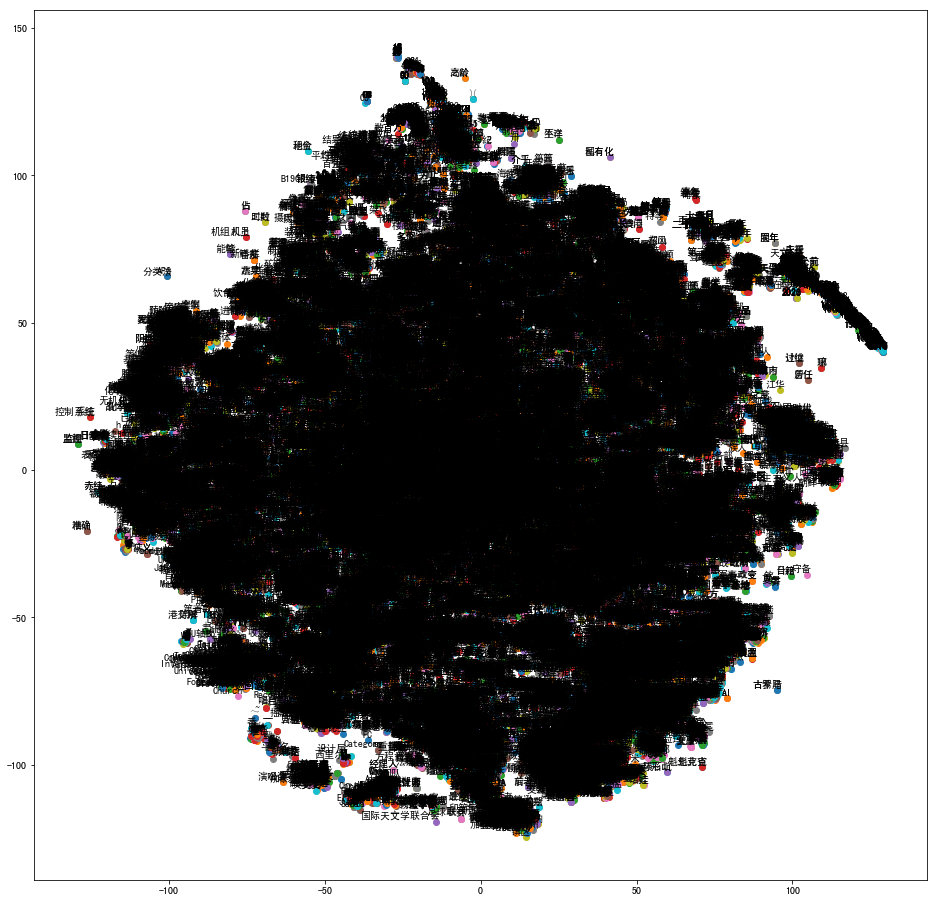

In [27]:
tsne_plot(model)

可能因为词太多了，min_count=500，还是黑黑一团。